In [7]:
#Referencia > https://gsnchez.com/blog/article/El-metodo-de-monte-carlo
import pandas_datareader.data as web
import numpy as np
from scipy.stats import norm

In [29]:
#get data from pandas datareader yahoo of Apple
df = web.DataReader(['AAPL'], data_source='yahoo', start='2022-05-01', end='2022-11-01')
#show data
df

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2022-05-02,157.248627,157.960007,158.229996,153.270004,156.710007,123055300.0
2022-05-03,158.761765,159.479996,160.710007,156.320007,158.149994,88966500.0
2022-05-04,165.272308,166.020004,166.479996,159.259995,159.669998,108256500.0
2022-05-05,156.063980,156.770004,164.080002,154.949997,163.850006,130525300.0
2022-05-06,156.801712,157.279999,159.440002,154.179993,156.009995,116124600.0
...,...,...,...,...,...,...
2022-10-26,149.102661,149.350006,151.990005,148.039993,150.960007,88194300.0
2022-10-27,144.560196,144.800003,149.050003,144.130005,148.070007,109180200.0


In [30]:
#Formula para precios actuales y anteriores
#price_today = price_previous * e^(r)

#Calcular r se usa el metodo browniano, consta de dos partes, volatilidad y drift
log_value = np.log(1 + df['Adj Close'].pct_change())

In [31]:
#cacular drift
mean = log_value.mean()
variance = log_value.var()
drift = mean - (0.5 * variance)

In [37]:
#calcular volatilidad
stdev = log_value.std().values
days_simulation = 30
iterations = 50
Z_value = norm.ppf(np.random.rand(days_simulation, iterations))
volatility = stdev * Z_value


In [38]:
#Calcular exponencial
daily_returns = np.exp(drift.values + volatility)


In [39]:
#Make the arrays for price calculations
prices = np.zeros_like(daily_returns)
prices[0] = df['Adj Close'].iloc[-1]

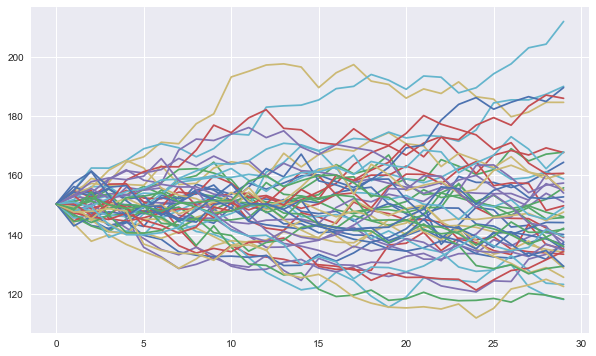

In [40]:
#Simulacion Monte Carlo
for t in range(1, days_simulation):
    prices[t] = prices[t - 1] * daily_returns[t]

#Graficar
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(prices)
plt.show()


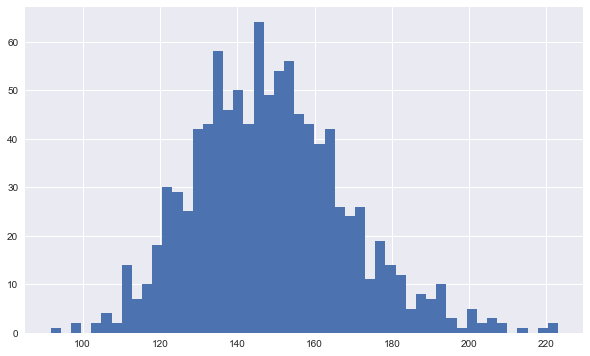

In [36]:
#Graficar frecuencia de precio 
plt.figure(figsize=(10, 6))
plt.hist(prices[-1], bins=50)
plt.show()
